# Addends, Maxima, and Mixtures

The remaining fun things in Chapter 5

In [5]:
from __future__ import print_function, division

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np

import sys
import os

tb_dir = "/home/pi/Programming/ThinkBayes2/"

sys.path.append(os.path.abspath(tb_dir + "thinkbayes2/"))
sys.path.append(os.path.abspath(tb_dir + "scripts/"))
sys.path.append(os.path.abspath(tb_dir + "thinkplot/"))

#from thinkbayes2 import Pmf, Cdf, Suite, Beta
import thinkbayes2
import thinkplot

# Addends
Dungeons and Dragons example. How do we model the sum of the distributions of a six sided die?

In [8]:
class Die(thinkbayes2.Pmf):
    def __init__(self,sides):
        thinkbayes2.Pmf.__init__(self)
        for x in range(1, sides+1):
            self.Set(x, 1)
        self.Normalize()

Create single six sided die

In [11]:
d6 = Die(6)
d6.Print()

1 0.16666666666666666
2 0.16666666666666666
3 0.16666666666666666
4 0.16666666666666666
5 0.16666666666666666
6 0.16666666666666666


Create a list of three dice and generate 1000 sample rolls with all three.

In [12]:
dice = [d6] * 3
three = thinkbayes2.SampleSum(dice, 1000)
three.Print()

3 0.005
4 0.014
5 0.023
6 0.045
7 0.07100000000000001
8 0.091
9 0.109
10 0.10300000000000001
11 0.14400000000000002
12 0.124
13 0.096
14 0.084
15 0.041
16 0.029
17 0.013000000000000001
18 0.008


Alternative way is to simply add up the dice. This is possible due to operator override of the "+" operator in the class definition of Pmf.

In [15]:
three_exact = d6 + d6 + d6
three_exact.Print()

3 0.004629629629629629
4 0.013888888888888888
5 0.027777777777777776
6 0.046296296296296294
7 0.06944444444444445
8 0.09722222222222222
9 0.11574074074074073
10 0.125
11 0.125
12 0.11574074074074074
13 0.09722222222222224
14 0.06944444444444445
15 0.046296296296296294
16 0.027777777777777776
17 0.013888888888888888
18 0.004629629629629629


Plot the two solutions

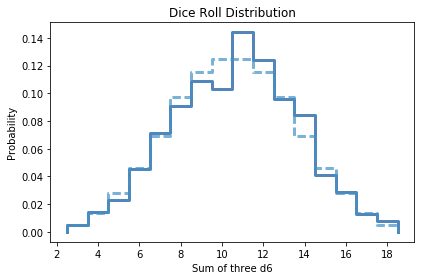

In [16]:
thinkplot.PrePlot(num=2)
thinkplot.Pmf(three)
thinkplot.Pmf(three_exact, linestyle="dashed")
thinkplot.decorate(title="Dice Roll Distribution",
                  xlabel="Sum of three d6",
                  ylabel="Probability")

# Maxima
What is the maximum of the distribution of the 3 dice in D&D? As before, we can simulate random samples or enumerate all possible pairs of values. But it is much simpler to convert to a CDF and finding the maximum that way.

In [17]:
best_attr_cdf = three_exact.Max(6)
best_attr_pmf = best_attr_cdf.MakePmf()

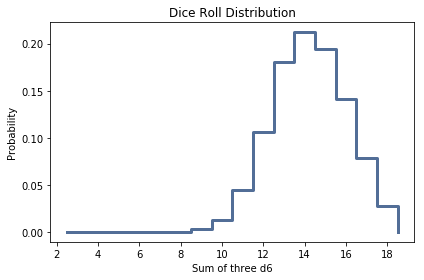

In [18]:
thinkplot.Pmf(best_attr_pmf)
thinkplot.decorate(title="Dice Roll Distribution",
                  xlabel="Sum of three d6",
                  ylabel="Probability")

# Mixtures
Say we have a whole bag of dice of different side counts and we want to model the distribution of a single random dice pulled from this bag. We need to create a mixture of the uniform distributions.

Let's start with a simple solution, two dice:

In [19]:
d6 = Die(6)
d8 = Die(8)

We can create a Pmf of the mixtures by adding up the contributions of each distribution

In [22]:
mix = thinkbayes2.Pmf()
for die in [d6, d8]:
    for outcome, prob in die.Items():
        mix.Incr(outcome, prob)
mix.Normalize()
mix.Print()

1 0.14583333333333334
2 0.14583333333333334
3 0.14583333333333334
4 0.14583333333333334
5 0.14583333333333334
6 0.14583333333333334
7 0.06250000000000001
8 0.06250000000000001


Now we get real fancy, a big ol bag of dice with different amounts of dice for each side count.

In [24]:
pmf_dice = thinkbayes2.Pmf()
pmf_dice.Set(Die(4), 5)
pmf_dice.Set(Die(6), 4)
pmf_dice.Set(Die(8), 3)
pmf_dice.Set(Die(12), 2)
pmf_dice.Set(Die(20), 1)
pmf_dice.Normalize()

15

Now mix it up

In [25]:
mix = thinkbayes2.Pmf()
for die, weight in pmf_dice.Items():
    for outcome, prob in die.Items():
        mix.Incr(outcome, weight*prob)

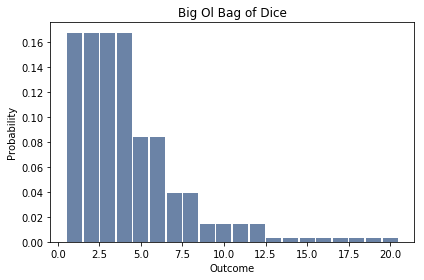

In [29]:
thinkplot.Hist(mix)
thinkplot.decorate(title="Big Ol Bag of Dice",
              xlabel="Outcome",
              ylabel="Probability")